In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt

import pose
from pose_parser import parse_file, detect_perspective



In [9]:
good_videos = [parse_file("dataset/bicep/bicep_good_"+ str(i) +".npy") for i in range(1,7)]
bad_videos = [parse_file("dataset/bicep/bicep_bad_" + str(i) + ".npy") for i in range(1,11)]



Data shape:  (114, 18, 3)
Mean torso:  360.11485467535044
Data shape:  (101, 18, 3)
Mean torso:  361.91618075058716
Data shape:  (140, 18, 3)
Mean torso:  274.49230143795376
Data shape:  (122, 18, 3)
Mean torso:  276.056770970454
Data shape:  (113, 18, 3)
Mean torso:  386.10674117118276
Data shape:  (117, 18, 3)
Mean torso:  388.8324699035529
Data shape:  (108, 18, 3)
Mean torso:  359.69948300318237
Data shape:  (146, 18, 3)
Mean torso:  362.94356251552193
Data shape:  (92, 18, 3)
Mean torso:  364.56482601788053
Data shape:  (120, 18, 3)
Mean torso:  364.55769028003914
Data shape:  (123, 18, 3)
Mean torso:  271.04817985102164
Data shape:  (100, 18, 3)
Mean torso:  274.544553716319
Data shape:  (127, 18, 3)
Mean torso:  276.5870125620258
Data shape:  (102, 18, 3)
Mean torso:  389.4333451516014
Data shape:  (108, 18, 3)
Mean torso:  366.72702499907354
Data shape:  (80, 18, 3)
Mean torso:  382.9545547331215


In [10]:
# # old one
# for video in good_videos:
#     frames = video

#     side = detect_perspective(frames)

#     if (side == pose.Side.right):
#         upper_arm_vecs = np.array([pose.Joint.vector_from_joints(frame.rshoulder, frame.relbow) for frame in frames])
#         lower_arm_vecs = np.array([pose.Joint.vector_from_joints(frame.relbow, frame.rwrist) for frame in frames])
#     else:
#         upper_arm_vecs = np.array([pose.Joint.vector_from_joints(frame.lshoulder, frame.lelbow) for frame in frames])
#         lower_arm_vecs = np.array([pose.Joint.vector_from_joints(frame.lelbow, frame.lwrist) for frame in frames])

#     # print(lower_arm_vecs)
#     print (upper_arm_vecs.shape)
#     print (upper_arm_vecs[0])

#     #Find the unit vector vec/mag(normalization axis=1)
#     upper_arm_vecs = upper_arm_vecs/ np.expand_dims(np.linalg.norm(upper_arm_vecs, axis=1), axis=1)
#     lower_arm_vecs = lower_arm_vecs/ np.expand_dims(np.linalg.norm(lower_arm_vecs, axis=1), axis=1)

#     #Angle = cos inverse of product of two unit vectors
#     # np.multiply(upper_arm_vecs, lower_arm_vecs)
#     # np.sum(np.multiply(upper_arm_vecs, lower_arm_vecs), axis=1)
#     upper_arm_forearm_angle = np.degrees(np.arccos(np.clip(np.sum(np.multiply(upper_arm_vecs, lower_arm_vecs), axis=1), -1.0, 1.0)))
#     print(upper_arm_forearm_angle)


In [11]:
# upper_arm_vecs = upper_arm_vecs/ np.expand_dims(np.linalg.norm(upper_arm_vecs, axis=1), axis=1)
# lower_arm_vecs = lower_arm_vecs/ np.expand_dims(np.linalg.norm(upper_arm_vecs, axis=1), axis=1)

In [12]:
# Clearer code for angle
for video in good_videos:
    frames = video

    side = detect_perspective(frames)

    #Angles to calculate
    upperarm_forearm_angles = []
    upperarm_torso_angles = []

    for frame in frames:
        if (side == pose.Side.right):
            upperarm = pose.Part(frame.relbow, frame.rshoulder)
            forearm = pose.Part(frame.relbow, frame.rwrist)
            torso = pose.Part(frame.rhip, frame.neck)
        else:
            upperarm = pose.Part(frame.lelbow, frame.lshoulder)
            forearm = pose.Part(frame.lelbow, frame.lwrist)
            torso = pose.Part(frame.lhip, frame.neck)
        angle1 = upperarm.calculate_angle(forearm)
        angle2 = upperarm.calculate_angle(torso)
        upperarm_forearm_angles.append(angle1)
        upperarm_torso_angles.append(angle2)

#Only the last one
upperarm_forearm_angles = np.array(upperarm_forearm_angles)
upperarm_torso_angles = np.array(upperarm_torso_angles)
print(upperarm_forearm_angles)
print(upperarm_torso_angles)



Primary arm: Right
Primary arm: Right
Primary arm: Right
Primary arm: Right
Primary arm: Left
Primary arm: Left
[173.51574349 171.6868499  178.80902341 178.22235159 173.97316456
  57.03912732 167.59378757 165.96030878 146.20635814 146.13161066
 153.21479444 146.07872302 136.95709993 145.82248876 139.70853588
 138.7966927  123.09043079 120.58237801 112.33116313 104.23120556
 106.67712894 105.87413265 100.65002322  95.45133633  89.50433923
  83.57873658  85.20493174  81.16671301  76.63067854  74.0318408
  73.11722827  67.26363966  63.94340164  63.77050918  62.95042193
  61.83192122  58.71062032  55.03724899 160.20155477 166.49896613
 159.81425827  44.9647873   43.61897619  43.60149257  65.09538886
 160.31628577 160.66832598 165.31319616 162.51140073 165.62790054
 164.79122013 161.84892867 162.388918   162.39636754 165.09164342
  48.82954944  51.10395947  55.88542447  60.9795618   64.46746589
  67.58437538  70.21039962  74.15296258  74.16292094  73.41900158
  77.95097731  83.941359    85.

Minimum Angle between Upper Arm and Forearm: 43.601492572999156


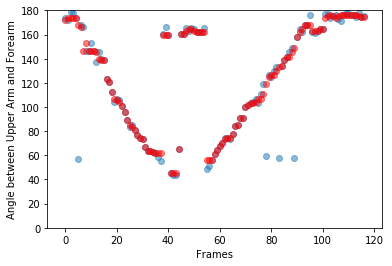

In [13]:
upperarm_forearm_angles_filtered = medfilt(upperarm_forearm_angles, 5)
upper_forearm_angles_filtered = medfilt(upperarm_forearm_angles_filtered, 5)
# The minimum angle between these two, i.e. if user moved all the way up
print("Minimum Angle between Upper Arm and Forearm: {}".format(np.min(upperarm_forearm_angles)))
plt.scatter(np.arange(upperarm_forearm_angles.shape[0]),upperarm_forearm_angles, alpha=0.5)
plt.scatter(np.arange(upperarm_forearm_angles_filtered.shape[0]),upperarm_forearm_angles_filtered, c='r', alpha=0.5)
plt.xlabel('Frames')
plt.ylabel('Angle between Upper Arm and Forearm')
# Set range on y-axis so the plots are consistent
plt.ylim(0,180) 
plt.show()
print("="*40)


Range of Angles between Upper Arm and Torso: 11.140242134876958


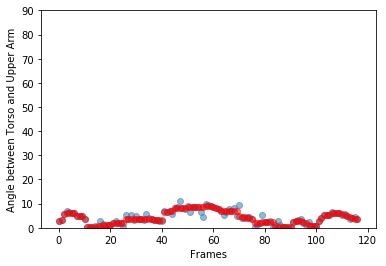

In [14]:
upperarm_torso_angles_filtered = medfilt(upperarm_torso_angles, 5)
upperarm_torso_angles_filtered = medfilt(upperarm_torso_angles_filtered, 5)
# Basically the amplitude of the first plot
print("Range of Angles between Upper Arm and Torso: {}".format(np.max(upperarm_torso_angles)-np.min(upperarm_torso_angles)))

# Generate plots
plt.scatter(np.arange(upperarm_torso_angles.shape[0]),upperarm_torso_angles, alpha=0.5)
plt.scatter(np.arange(upperarm_torso_angles_filtered.shape[0]),upperarm_torso_angles_filtered, c='r', alpha=0.5)
plt.xlabel('Frames')
plt.ylabel('Angle between Torso and Upper Arm')
# Set range on y-axis so the plots are consistent
plt.ylim(0,90) 
plt.show()